Data Visualization - Assignment 2 -- Sanjay Roberts

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta
%matplotlib inline

Assignment 2, Part 1: Create a list of the atomic weights of the first six elements of the periodic table, each rounded to the nearest integer. Provide two pie charts as follows: (1) each slice annotated with a percentage of the whole, and (2) each slice annotated with its atomic weight. Explode a different element with each chart.

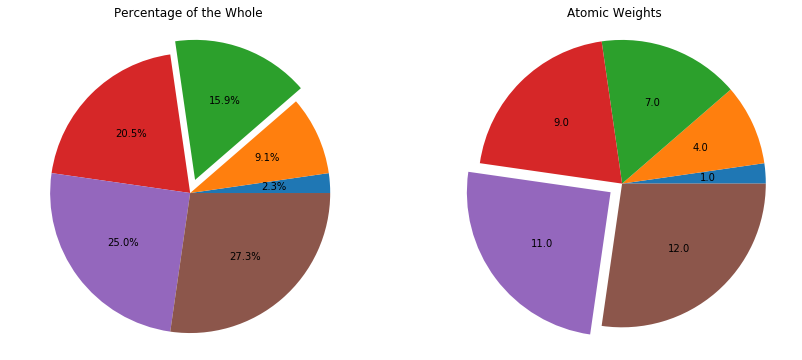

In [153]:
weights = [1,4,7,9,11,12]
explode=(0,0,0.1,0,0,0)     # tuple
fig,ax=plt.subplots(1,2,figsize=(14,6),num=59)

ax[0].pie(weights,explode=explode,
  autopct='%1.1f%%')
ax[0].set_title('Percentage of the Whole')
ax[0].axis('equal')

sizes = np.array([1,4,7,9,11,12])
explode=(0,0,0,0,0.1,0)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

ax[1].pie(weights,explode=explode,
         autopct=absolute_value)
ax[1].set_title('Atomic Weights')
ax[1].axis('equal')
plt.show()

Assignment 2, Part 2: Read into a DataFrame the file py_ide2.csv and provide both a horizontal bar chart and a vertical bar chart, complete with all labels. Be sure to rotate the IDE names so that they are readable.

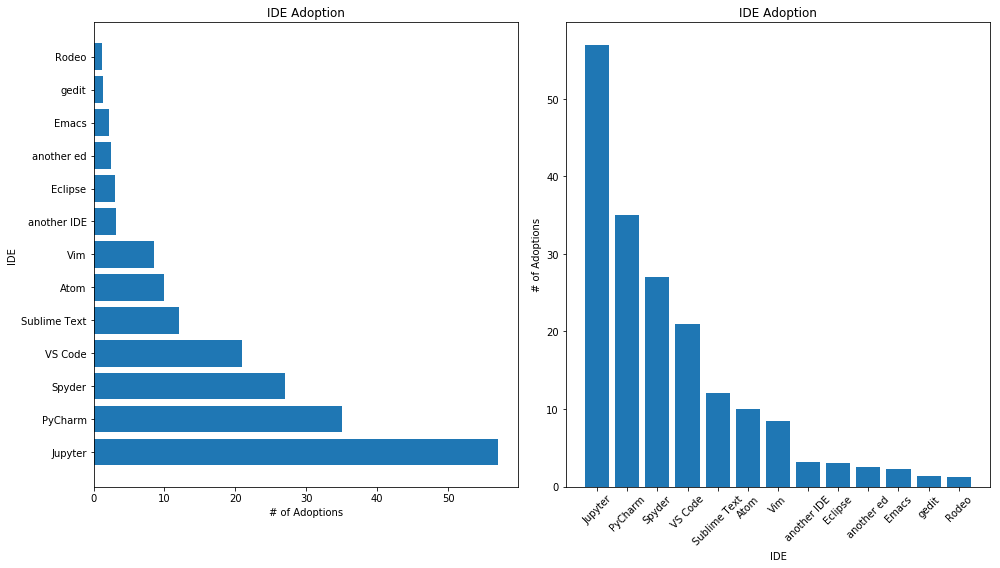

In [154]:
df=pd.read_csv('py_ide2.csv')
fig,ax=plt.subplots(1,2,figsize=(14,8),num=91)
ax[0].barh(df['IDE'], df['Adoption'])
ax[0].set_title('IDE Adoption')
ax[0].set_xlabel('# of Adoptions')
ax[0].set_ylabel('IDE')
plt.xticks(range(len(df)), df['IDE'],rotation=45)
ax[1].bar( range(len(df)), df['Adoption'])
ax[1].set_title('IDE Adoption')
ax[1].set_ylabel('# of Adoptions')
ax[1].set_xlabel('IDE')
plt.tight_layout()
plt.show()

Assignment 2, Part 3: Construct a list of eight strings that represent days evenly spread out. Drawing from the random uniform distribution, make an array of eight floats ranging from 100 to 200 in value. Establish a DataFrame from that list and that array, convert the dates to pandas datetime objects and set them to the index. Make two charts in the same window or canvas as follows: (1) line plot of the values vs. dates, and (2) bar chart of the same.

In [155]:
dlist=['2016-03-01','2016-03-3','2016-03-5',
  '2016-03-7','2016-03-9','2016-03-11','2016-03-13','2016-03-15']
ulist = np.random.uniform(100,200,8)
d2={'date':dlist, 'values':ulist}
df2=pd.DataFrame(d2)
df2['date']=pd.to_datetime(df2['date'])
df2=df2.set_index('date')

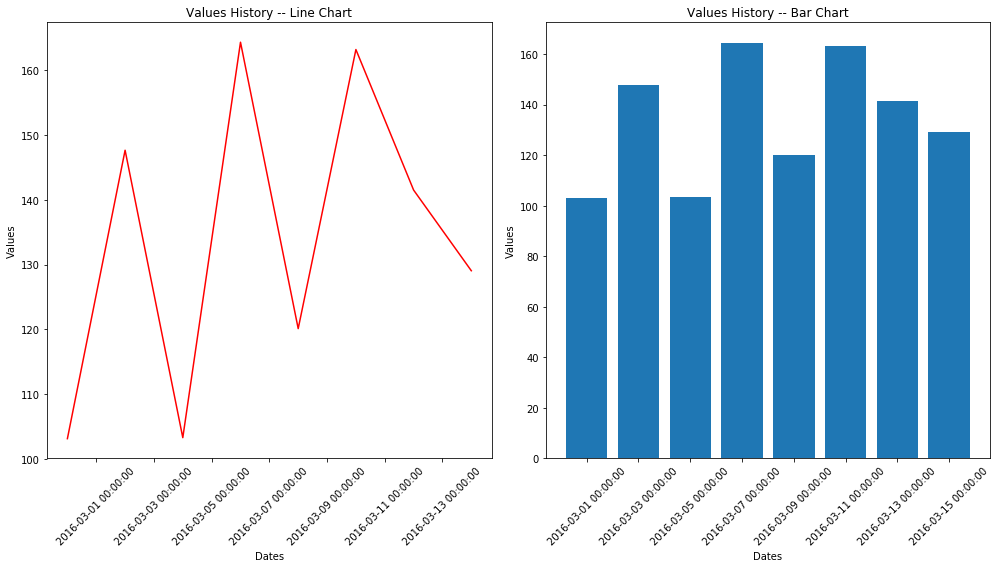

In [156]:
fig,ax=plt.subplots(1,2,figsize=(14,8),num=91)

ax[0].plot(df2['values'],color='r')
ax[0].set_title('Values History -- Line Chart')
ax[0].set_ylabel('Values')
ax[0].set_xlabel('Dates')
ax[0].set_xticklabels(df2.index, rotation=45)
plt.tight_layout()

plt.xticks(range(len(df2)), df2.index, rotation=45)
ax[1].bar(range(len(df2)), df2['values'])
ax[1].set_title('Values History -- Bar Chart')
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Values')
plt.tight_layout()
plt.show()

Assignment 2, Part 4: Pull from Yahoo Finance the closing prices and volumes of the stock of your choice over the trading days of one month and plot the prices and volumes on a canvas in two separate panels, one above the other, with the dates aligned.

In [157]:
#!pip install fix-yahoo-finance
#!pip install yfinance --upgrade --no-cache-dir

In [158]:
import yfinance as yf

df=yf.download('AMZN','2019-01-01','2019-01-31')
df = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
print(df.head(20))



[*********************100%***********************]  1 of 1 downloaded
              Close   Volume
Date                        
2019-01-02  1539.13  7983100
2019-01-03  1500.28  6975600
2019-01-04  1575.39  9182600
2019-01-07  1629.51  7993200
2019-01-08  1656.58  8881400
2019-01-09  1659.42  6348800
2019-01-10  1656.22  6507700
2019-01-11  1640.56  4686200
2019-01-14  1617.21  6005900
2019-01-15  1674.56  5998500
2019-01-16  1683.78  6366900
2019-01-17  1693.22  4208900
2019-01-18  1696.20  6020500
2019-01-22  1632.17  6416800
2019-01-23  1640.02  5225200
2019-01-24  1654.93  4089900
2019-01-25  1670.57  4945900
2019-01-28  1637.89  4837700
2019-01-29  1593.88  4632800
2019-01-30  1670.43  5783800


/Users/sanjayroberts1/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


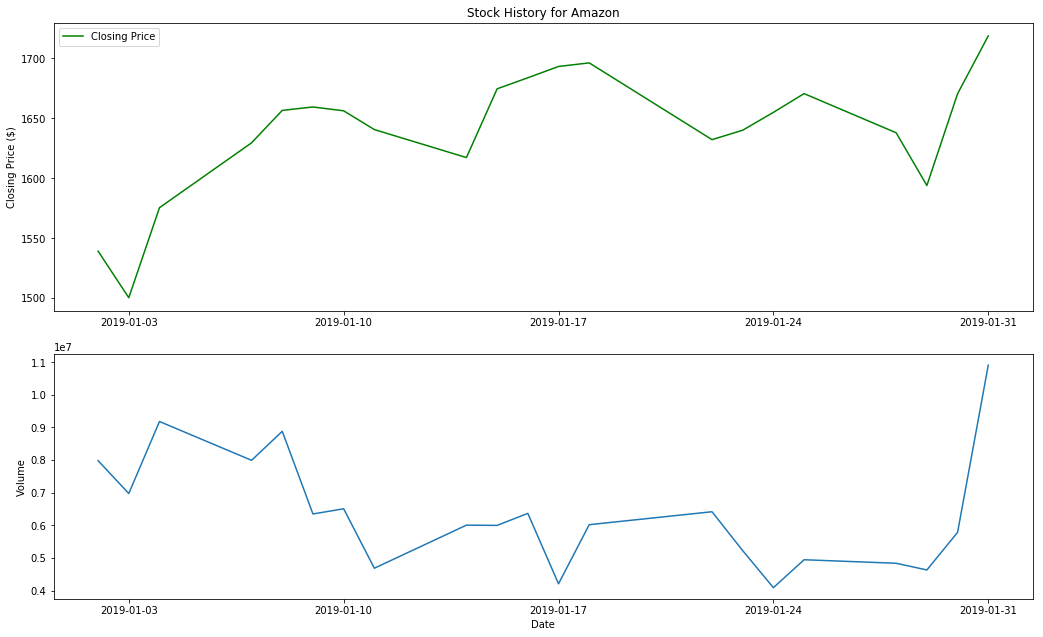

In [161]:
fig=plt.figure(figsize=(16,10))
ax1=fig.add_axes([0.1,0.85,0.85,0.40])
ax2=fig.add_axes([0.1,0.45,0.85,0.34])
ax1.plot(df.index, df.Close,'g',label='Closing Price')
ax1.legend(loc=0)
ax2.plot(df.index, df.Volume)
ax2.set_xlabel('Date')
ax1.set_title('Stock History for Amazon')
ax1.set_ylabel('Closing Price ($)')
ax2.set_ylabel('Volume')
plt.tight_layout()
plt.show()